<a href="https://colab.research.google.com/github/amkayhani/DSML24/blob/main/customer_segmentation_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Lab

# Step 1: Install and Import Necessary Libraries ---

In [ ]:
# First, ensure all required libraries are installed. Uncomment the following lines if necessary.
# !pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Dataset

In [ ]:

# Upload and load your supermarket data
file_path = '/content/supermarket_data_cleaned.csv'  # Adjust if necessary
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()

,Customer_ID,Age,Education,Num_children,Has_partner,Family_size,Is_parent,Income,Recency,Total_spent,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_offers_accepted
0,N1,58,1,0,0,1,0,58138,58,1617,...,546,172,88,88,3,8,10,4,7,0
1,N2,61,1,2,0,3,1,46344,38,27,...,6,2,1,6,2,1,1,2,5,0
2,N3,50,1,0,1,2,0,71613,26,776,...,127,111,21,42,1,8,2,10,4,0
3,N4,31,1,1,1,3,1,26646,26,53,...,20,10,3,5,2,2,0,4,6,0
4,N5,34,2,1,1,3,1,58293,94,422,...,118,46,27,15,5,5,3,6,5,0


# Step 3: Drop Unnecessary Features

In [ ]:
# If there are columns you wish to remove, you can list them here
columns_to_drop = []  # Example: ['CustomerID', 'Gender']
data = data.drop(columns=columns_to_drop)

# Step 4: Select Features for Segmentation

In [ ]:
# Choose relevant features for customer segmentation
# Common features include spending amount, frequency, age, etc.
# Here, we assume columns like 'Total_Spent' and 'Frequency' are available.

features = data[['Total_spent', 'Age']]

# Quick check
features.describe()

,Total_spent,Age
count,2212.000000,2212.000000
mean,607.268083,46.086347
std,602.513364,11.701599
min,5.000000,19.000000
25%,69.000000,38.000000
50%,397.000000,45.000000
75%,1048.000000,56.000000
max,2525.000000,75.000000


# Step 5: Preprocess the Data


In [ ]:
# Standardise the features for better performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 6: Determine the Optimal Number of Clusters

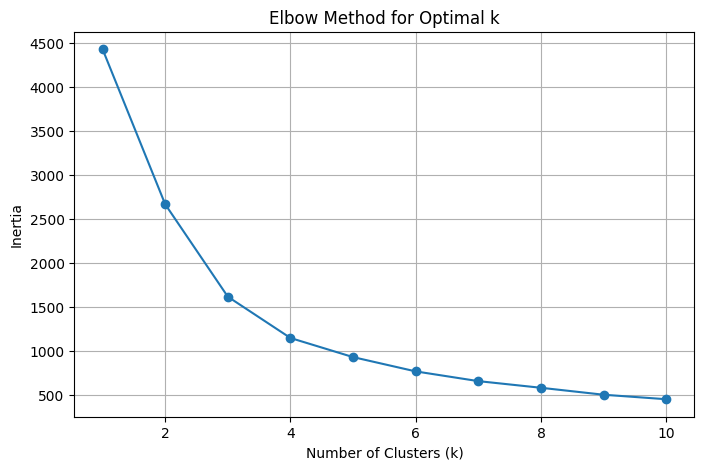

In [ ]:
# We use the Elbow Method to find the best 'k'

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 7: Apply KMeans Clustering


In [ ]:
# Based on the elbow plot, choose the appropriate number of clusters
optimal_k = 4  # Example value; adjust after viewing the elbow plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Step 8: Visualise the Clusters

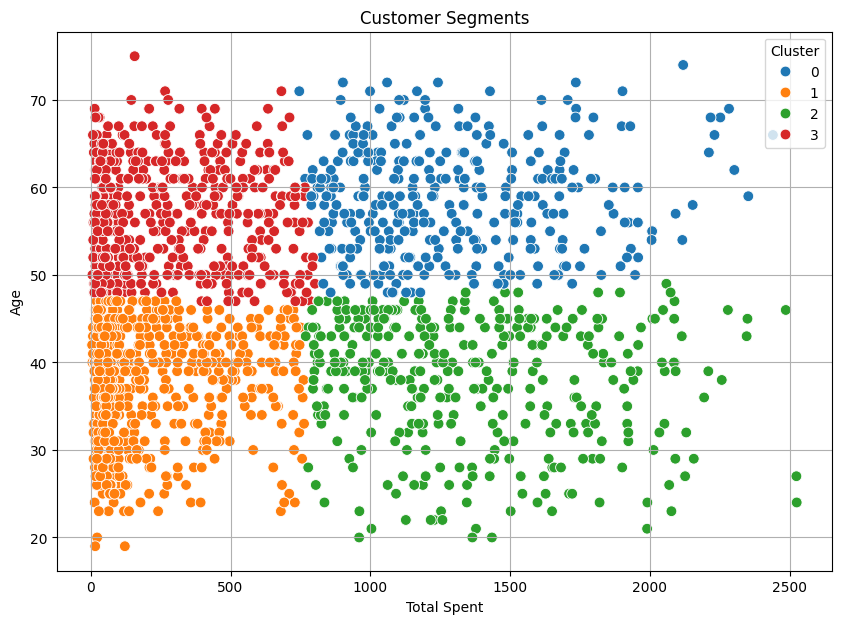

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Total_spent',
    y='Age',
    hue='Cluster',
    palette='tab10',
    data=data,
    s=60
)
plt.title('Customer Segments')
plt.xlabel('Total Spent')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# --- Step 9: Interpret the Results ---

# Group by cluster to observe differences
numeric_cols = data.select_dtypes(include='number').columns
summary = data.groupby('Cluster')[numeric_cols].mean()
summary



,Age,Education,Num_children,Has_partner,Family_size,Is_parent,Income,Recency,Total_spent,Total_num_purchase,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Num_offers_accepted,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,58.584211,1.352632,0.500000,0.618421,2.118421,0.436842,72021.136842,49.707895,1287.565789,19.815789,...,77.807895,53.215789,77.421053,2.128947,5.739474,5.615789,8.460526,3.744737,0.536842,0.0
1,37.628604,1.151096,1.137255,0.663206,2.800461,0.891580,37030.719723,47.709343,176.531719,7.636678,...,12.217993,8.670127,24.129181,2.419839,2.888120,0.867359,3.881200,6.462514,0.111880,1.0
2,37.700495,1.292079,0.443069,0.638614,2.081683,0.408416,73311.589109,49.905941,1355.039604,20.019802,...,87.113861,64.190594,76.509901,1.886139,5.680693,5.569307,8.769802,3.737624,0.700495,2.0
3,56.730838,1.374332,1.320856,0.641711,2.962567,0.848485,46062.996435,49.939394,273.641711,9.909091,...,14.126560,10.971480,28.367201,2.625668,3.677362,1.381462,4.850267,5.766488,0.135472,3.0


# Discuss:
# - Which group spends the most?
# - Which group visits most frequently?
# - Are there low-frequency, high-spending customers?
# Use these insights for business strategies like personalised marketing.